<a href="https://colab.research.google.com/github/dgg32/satellite_water/blob/master/satellite_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from tensorflow.keras.preprocessing.image import load_img
import rasterio
import matplotlib.pyplot as plt
from keras import backend as K

In [89]:

filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Decimation factor= 81


Text(0, 0.5, 'Row #')

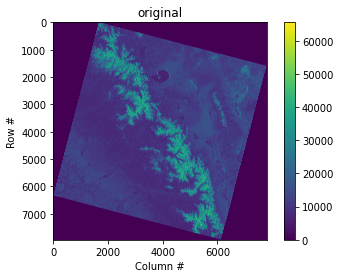

In [90]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
   oviews = src.overviews(1) # list of overviews from biggest to smallest
   oview = oviews[-1] # let's look at the smallest thumbnail
   print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   
   thumbnail = src.read(1)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('original'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [91]:

def three_transformation_grey(image):
    image_tsp = K.transpose(image)
    image_cw90 = K.reverse(image, axes=0)  # clock wise
    image_ccw90 = K.reverse(image, axes=1)  # counter clock wise

    plt.figure()
    plt.subplot(221)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    plt.subplot(222)
    plt.imshow(K.eval(image_tsp), cmap='gray')
    plt.title('Transposed')
    plt.axis('off')
    plt.subplot(223)
    plt.imshow(K.eval(image_cw90), cmap='gray')
    plt.title('Rotated 90˚ cw')
    plt.axis('off')
    plt.subplot(224)
    plt.imshow(K.eval(image_ccw90), cmap='gray')
    plt.title('Rotated 90˚ ccw')
    plt.axis('off')
    plt.show()

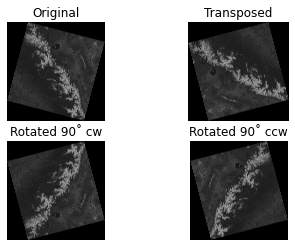

In [92]:
three_transformation(thumbnail)